## introduction
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis.


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

from matplotlib.pyplot import figure
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import seaborn as sn
import warnings
from sklearn.exceptions import DataConversionWarning

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 



In [29]:
df = pd.read_csv("C:/Users/الوعد للحاسبات/Downloads/SeoulBikeData.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### Dataset Description
There is:<br><b>8760 row</b><br><b>14 columns</b><br>Attribute Information:<br>
Date : year-month-day<br>
Rented Bike count - Count of bikes rented at each hour<br>
Hour - Hour of he day<br>
Temperature-Temperature in Celsius<br>
Humidity - %<br>
Windspeed - m/s<br>
Visibility - 10m<br>
Dew point temperature - Celsius<br>
Solar radiation - MJ/m2<br>
Rainfall - mm<br>
Snowfall - cm<br>
Seasons - Winter, Spring, Summer, Autumn<br>
Holiday - Holiday/No holiday<br>
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)<br>

In [6]:
df.sample(5)

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6292,20/08/2018,193,4,26.2,65,1.1,1542,19.0,0.00,0.0,0.0,Summer,No Holiday,Yes
8446,17/11/2018,655,22,4.4,43,1.1,2000,-7.1,0.00,0.0,0.0,Autumn,No Holiday,Yes
7405,05/10/2018,22,13,16.9,95,1.6,325,16.0,0.48,4.0,0.0,Autumn,No Holiday,Yes
5068,30/06/2018,382,4,21.7,93,0.1,244,20.5,0.00,0.0,0.0,Summer,No Holiday,Yes
3948,14/05/2018,1095,12,20.0,62,1.8,428,12.4,2.38,0.0,0.0,Spring,No Holiday,Yes


# Questions

### How do the temperatures change across the seasons? What are the mean and median temperatures?




### is temperature associated with bike rentals?

### Can the number of total bike rentals be predicted by holiday and weather?

### What are the mean temperature, humidity, windspeed and total rentals per months?

What percentage of days are appropriate for biking concerning the weather with conditions

Temperature > 5°, weather situation 1-3, windspeed < 40 km/h and

Temperature > 10°, weather situation 1-2, windspeed < 20 km/h?




In [31]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [32]:
df['WeekDay']=df['Date'].dt.day_name()

In [33]:
df['Month']=df['Date'].dt.month

In [34]:
mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

df['WeekDayEncoding']=df['WeekDay'].map(mapping_dictDay)

In [35]:
df

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,WeekDay,Month,WeekDayEncoding
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,4
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,4
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,4
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,4
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,5
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,5
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,5
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,5


### Analyses
1. How do the temperatures change across the seasons? What are the mean and median temperatures?

In [3]:
DD = df.groupby(['Date', 'Seasons', 'Holiday' , 'Functioning Day'], as_index=False).agg( \
                                                                                   {'Rented Bike Count': 'sum',\
                                                                                    'Temperature(�C)' : 'mean',\
                                                                                    'Visibility (10m)' : 'mean',\
                                                                                    'Humidity(%)' : 'mean',                                                                                   
                                                                                   })

In [4]:
DD

,Date,Seasons,Holiday,Functioning Day,Rented Bike Count,Temperature(�C),Visibility (10m),Humidity(%)
0,01/01/2018,Winter,Holiday,Yes,4290,-1.283333,1894.833333,39.333333
1,01/02/2018,Winter,No Holiday,Yes,5377,-3.866667,1923.625000,44.000000
2,01/03/2018,Spring,Holiday,Yes,5132,0.450000,1084.000000,64.208333
3,01/04/2018,Spring,No Holiday,Yes,17388,15.183333,831.833333,68.916667
4,01/05/2018,Spring,Holiday,Yes,26820,20.341667,456.458333,72.791667
...,...,...,...,...,...,...,...,...
361,31/05/2018,Spring,No Holiday,Yes,31681,20.525000,1246.208333,61.208333
362,31/07/2018,Summer,No Holiday,Yes,22897,32.525000,1993.791667,49.625000
363,31/08/2018,Summer,No Holiday,Yes,27817,25.558333,1609.000000,67.166667
364,31/10/2018,Autumn,No Holiday,Yes,21545,7.529167,1960.916667,55.000000


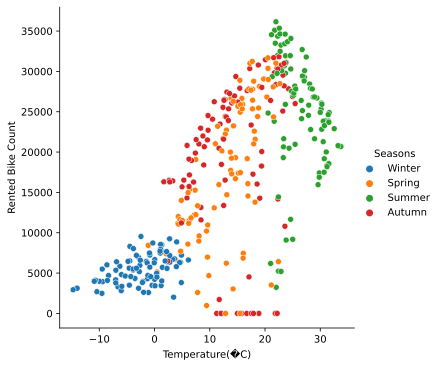

In [5]:
sns.relplot(data=DD, x="Temperature(�C)", y="Rented Bike Count", hue="Seasons")

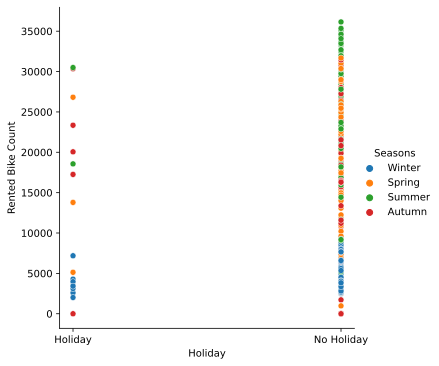

In [7]:
sns.relplot(data=DD, x="Holiday", y="Rented Bike Count", hue="Seasons")

Is there a correlation between the temp/atemp/mean.temp.atemp and the total count of bike rentals?

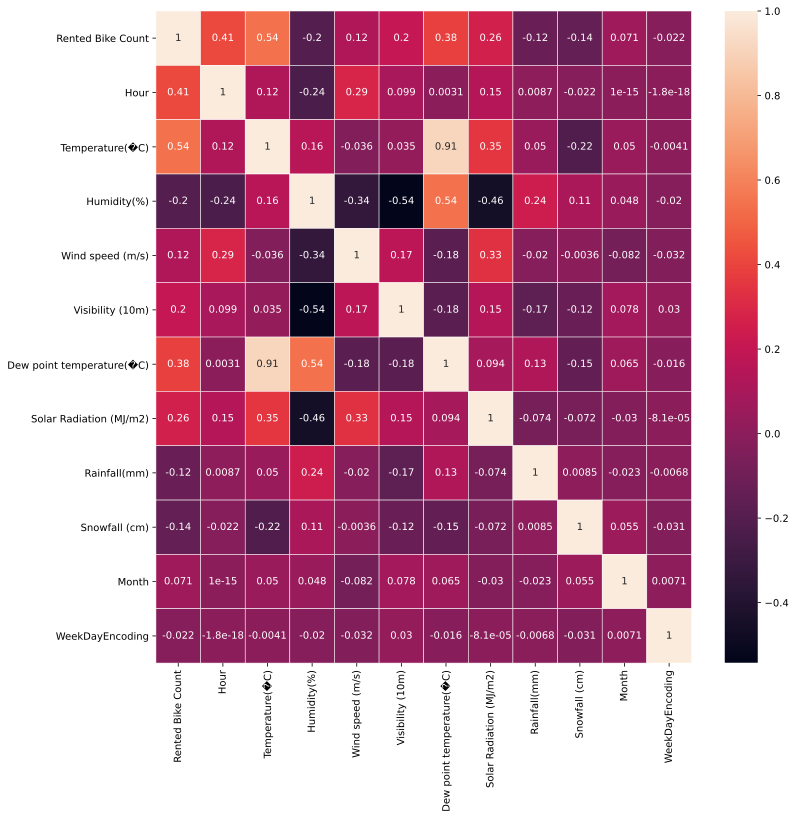

In [36]:
corrMatrix = df.corr()

fig, ax = plt.subplots(figsize=(12,12)) # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

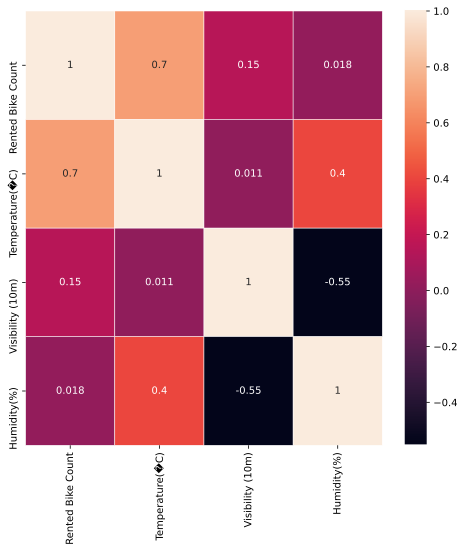

In [37]:
corrMatrix = DD.corr()

fig, ax = plt.subplots(figsize=(8,8)) # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

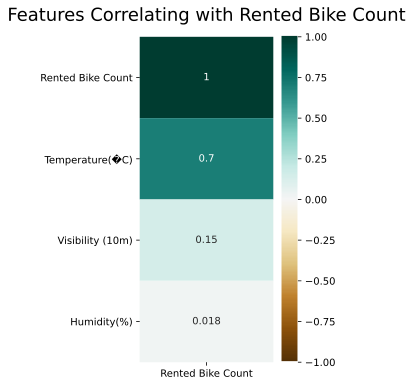

In [38]:
plt.figure(figsize=(3, 6))
heatmap = sns.heatmap(corrMatrix[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Rented Bike Count', fontdict={'fontsize':18}, pad=16);

<AxesSubplot:xlabel='Holiday', ylabel='count'>

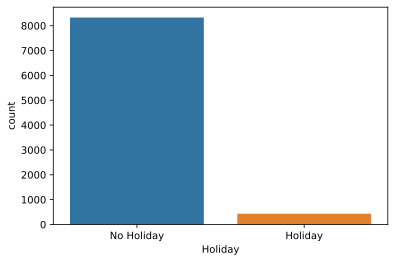

In [44]:
sns.countplot(x="Holiday", data=df)

In [45]:
df['Date'] = pd.to_datetime(df['Date'])

In [46]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.tail()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,WeekDay,Month,WeekDayEncoding,Year,Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,5,2018,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,5,2018,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,5,2018,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,5,2018,30
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,5,2018,30


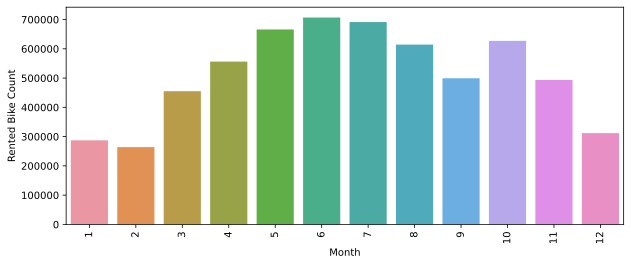

In [48]:
Month = df.groupby("Month").sum().reset_index()
plt.figure(figsize=(10,4), dpi=150)
sns.barplot(x="Month", y="Rented Bike Count", data=Month)
plt.xticks(rotation=90);

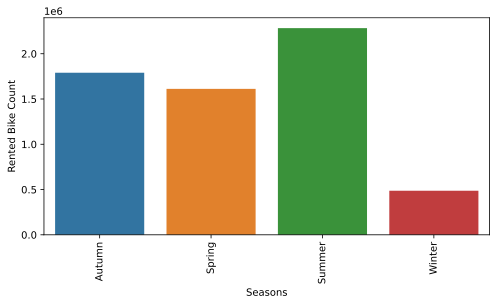

In [50]:
Season = df.groupby("Seasons").sum().reset_index()
plt.figure(figsize=(8,4), dpi=150)
sns.barplot(x="Seasons", y="Rented Bike Count", data=Season)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

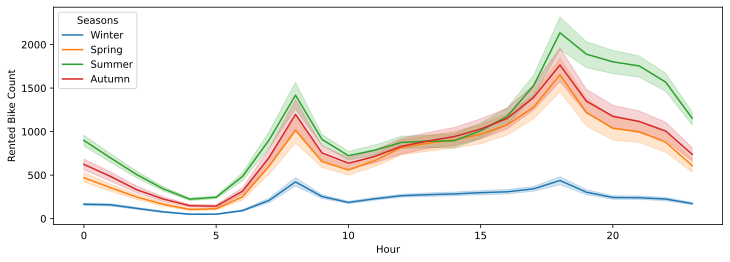

In [51]:
plt.figure(figsize=(12,4), dpi=100)
sns.lineplot(data=df, x="Hour", y="Rented Bike Count", hue="Seasons")

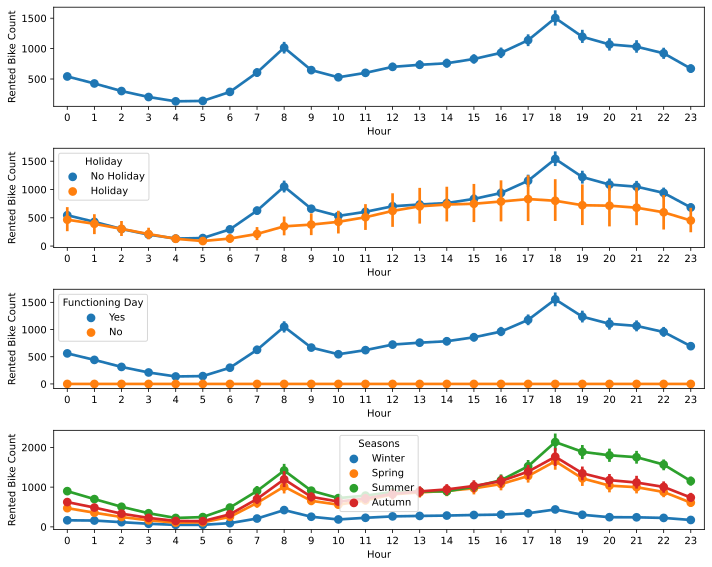

In [53]:
fig, axs = plt.subplots(nrows=4,ncols=1,figsize=(10,8), dpi=100)
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[0])
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[1], 
              hue="Holiday")
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[2], 
              hue="Functioning Day")
sns.pointplot(data=df, x="Hour", y="Rented Bike Count", ax=axs[3], 
              hue="Seasons")
plt.tight_layout()

In [11]:
Temp_df = df[['Seasons', 'Temperature(�C)']]

In [12]:
Temp_df

,Seasons,Temperature(�C)
0,Winter,-5.2
1,Winter,-5.5
2,Winter,-6.0
3,Winter,-6.2
4,Winter,-6.0
...,...,...
8755,Autumn,4.2
8756,Autumn,3.4
8757,Autumn,2.6
8758,Autumn,2.1


In [54]:
Sdf = Temp_df[Temp_df['Seasons'] == 'Spring']
Smdf = Temp_df[Temp_df['Seasons'] == 'Summer']
Adf = Temp_df[Temp_df['Seasons'] == 'Autumn']
Wdf = Temp_df[Temp_df['Seasons'] == 'Winter']

In [55]:
print("Spring: ")
print(f"The mean temperature of Spring was {Sdf['Temperature(�C)'].mean()}.")
print(f"The median temperature of Spring was {Sdf['Temperature(�C)'].median()}.")
print(f"The standard deviation of the temperature in Spring was {Sdf['Temperature(�C)'].std()}.")
print("Summer: ")
print(f"The mean temperature of Summer was {Smdf['Temperature(�C)'].mean()}.")
print(f"The median temperature of Summer was {Smdf['Temperature(�C)'].median()}.")
print(f"The standard deviation of the temperature in Summer was {Smdf['Temperature(�C)'].std()}.")
print("Autumn: ")
print(f"The mean temperature of Autumn was {Adf['Temperature(�C)'].mean()}.")
print(f"The median temperature of Autumn was {Adf['Temperature(�C)'].median()}.")
print(f"The standard deviation of the temperature in Autumn was {Adf['Temperature(�C)'].std()}.")
print("Winter: ")
print(f"The mean temperature of Winter was {Wdf['Temperature(�C)'].mean()}.")
print(f"The median temperature of Winter was {Wdf['Temperature(�C)'].mean()}.")
print(f"The standard deviation of the temperature in Winter was {Wdf['Temperature(�C)'].std()}.")

Spring: 
The mean temperature of Spring was 13.046693840579712.
The median temperature of Spring was 13.3.
The standard deviation of the temperature in Spring was 6.61715431649567.
Summer: 
The mean temperature of Summer was 26.582789855072505.
The median temperature of Summer was 26.6.
The standard deviation of the temperature in Summer was 4.662298828316205.
Autumn: 
The mean temperature of Autumn was 14.1208333333333.
The median temperature of Autumn was 13.850000000000001.
The standard deviation of the temperature in Autumn was 7.062296647442591.
Winter: 
The mean temperature of Winter was -2.5404629629629607.
The median temperature of Winter was -2.5404629629629607.
The standard deviation of the temperature in Winter was 5.469762920730906.


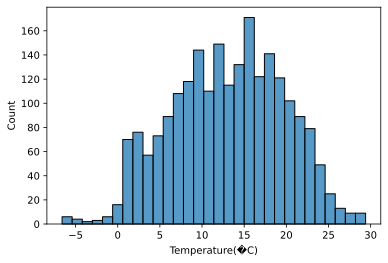

In [56]:
sns.histplot(Sdf['Temperature(�C)'], kde=False,bins=30, stat='count');

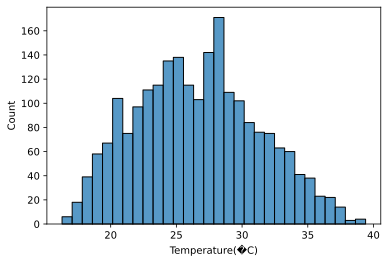

In [57]:
sns.histplot(Smdf['Temperature(�C)'], kde=False,bins=30, stat='count');

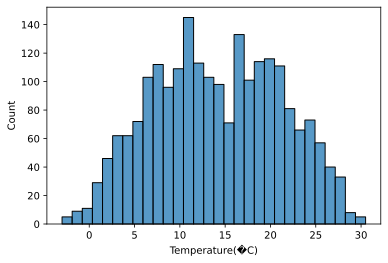

In [58]:
sns.histplot(Adf['Temperature(�C)'], kde=False,bins=30, stat='count');

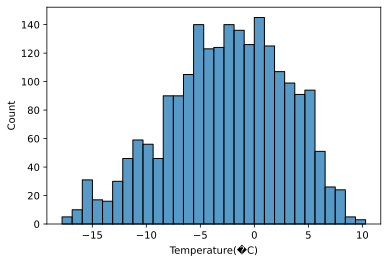

In [59]:
sns.histplot(Wdf['Temperature(�C)'], kde=False,bins=30, stat='count');

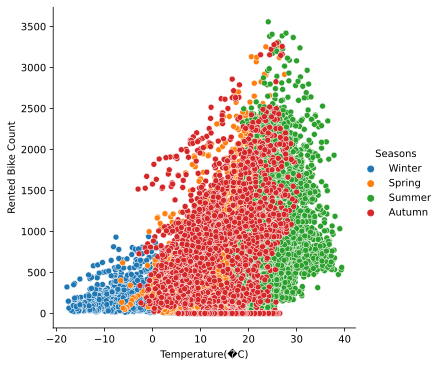

In [60]:
sns.relplot(data=df, x="Temperature(�C)", y="Rented Bike Count", hue="Seasons")

## Encoding Categorical data:

In [ ]:
ohe1=pd.get_dummies(df['Seasons'])
df = df.drop(['Seasons'], axis=1)
df = pd.merge(df, ohe1, right_index=True, left_index=True)

In [ ]:
ohe2=pd.get_dummies(df['Functioning Day'])
df = df.drop(['Functioning Day'], axis=1)
df = pd.merge(df, ohe2, right_index=True, left_index=True)

In [ ]:
ohe3=pd.get_dummies(df['Holiday'])
df = df.drop(['Holiday'], axis=1)
df = pd.merge(df, ohe3, right_index=True, left_index=True)

In [ ]:
df

## Extracting independent variable:
First I move Y column to the end of dataframe

In [ ]:
df = df[['Date', 'Hour', 'Temperature(�C)', 'Humidity(%)', \
         'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(�C)', \
         'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Autumn', \
         'Spring', 'Summer', 'Winter', 'No', 'Yes', 'Holiday', 'No Holiday', 'Rented Bike Count']]

In [ ]:
x= df.iloc[:,:-1].values  

In [ ]:
x

## Extracting dependent variable:

In [ ]:
y= df.iloc[:,-1].values  

In [ ]:
y